Name: Nikhil V

Roll No: CH.EN.U4AIE22038

Lab 6: Transfer Learning on pretrained models for MNIST dataset

# Importing the required modules

In [9]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical  # Corrected import

# Module used for random choice from an iterable.
import random as r

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for training models.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.applications.resnet50 import ResNet50


# Loading the MNIST dataset

In [10]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

# Image Manipulation for Transfer Learning using pretrained models

In [11]:
class ImageManipulation:

    def __init__(self, x_train, x_test, y_train, y_test) -> None:
        self.x_train = x_train
        self.x_test = x_test
        self.y_test = y_test
        self.y_train = y_train
        self.x_val = None
        self.y_val = None
    
    def __apply_padding(self):
        self.x_train = tf.pad(self.x_train, [[0, 0], [2,2], [2,2]])/255
        self.x_test = tf.pad(self.x_test, [[0, 0], [2,2], [2,2]])/255
    
    def __expand_dimensions(self):
        self.x_train = tf.expand_dims(self.x_train, axis=3, name=None)
        self.x_test = tf.expand_dims(self.x_test, axis=3, name=None)
    
    def __repeat_images(self):
        self.x_train = tf.repeat(self.x_train, 3, axis=3)
        self.x_test = tf.repeat(self.x_test, 3, axis=3)
    
    def __create_train_validation(self):
        self.x_val = self.x_train[-2000:,:,:]
        self.y_val = self.y_train[-2000:]
        self.x_train = self.x_train[:-2000,:,:]
        self.y_train = self.y_train[:-2000]
    
    def preprocess_imgs(self):
        self.__apply_padding()
        self.__expand_dimensions()
        self.__repeat_images()
        self.__create_train_validation()

# Image Manipulation

## Loading the data

In [12]:
i = ImageManipulation(x_train, x_test, y_train, y_test)

## Preprocessing the data

In [13]:
i.preprocess_imgs()

# Transfer Learning using ResNet50

In [14]:
class TransferLearning:

    def __init__(self, x_train, x_val, y_train, y_val) -> None:
        self.x_train = x_train
        self.x_val = x_val
        self.y_val = y_val
        self.y_train = y_train
        self.model = None
        self.history = None

    def load_model(self):
        self.model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
    
    def mark_layers_non_trainable(self):
        for layer in self.model.layers:
            layer.trainable = False
    
    def add_final_layer(self):
        self.x = layers.Flatten()(self.model.output)
        self.x = layers.Dense(1000, activation='relu')(self.x)
        self.predictions = layers.Dense(10, activation = 'softmax')(self.x)

    def compile_model(self):
        self.model = Model(inputs = self.model.input, outputs = self.predictions)
        self.model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    
    def train_model(self):
        self.history = self.model.fit(self.x_train, self.y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))
    
    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(15,15))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].title.set_text('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train','Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])

# Initialisation of the model

In [16]:
t = TransferLearning(i.x_train, i.x_val, i.y_train, i.y_val)

# Loading the model

In [17]:
t.load_model()



94765736/94765736 [==============================] - 74s 1us/step


# Fine-tuning the model and compiling the model architecture

In [18]:
t.mark_layers_non_trainable()
t.add_final_layer()
t.compile_model()

# Fitting the model

Epoch 1/10


1813/1813 [==============================] - 91s 49ms/step - loss: 0.5550 - accuracy: 0.8212 - val_loss: 0.2763 - val_accuracy: 0.9155
Epoch 2/10
1813/1813 [==============================] - 94s 52ms/step - loss: 0.3509 - accuracy: 0.8842 - val_loss: 0.2873 - val_accuracy: 0.9090
Epoch 3/10
1813/1813 [==============================] - 105s 58ms/step - loss: 0.3028 - accuracy: 0.9018 - val_loss: 0.2028 - val_accuracy: 0.9370
Epoch 4/10
1813/1813 [==============================] - 90s 50ms/step - loss: 0.2789 - accuracy: 0.9091 - val_loss: 0.1611 - val_accuracy: 0.9550
Epoch 5/10
1813/1813 [==============================] - 95s 53ms/step - loss: 0.2559 - accuracy: 0.9159 - val_loss: 0.1646 - val_accuracy: 0.9525
Epoch 6/10
1813/1813 [==============================] - 90s 50ms/step - loss: 0.2355 - accuracy: 0.9231 - val_loss: 0.1575 - val_accuracy: 0.9550
Epoch 7/10
1813/1813 [==============================] - 185s 102ms/step - loss: 0.2265 - accuracy: 0.9263 - val_loss: 0.1

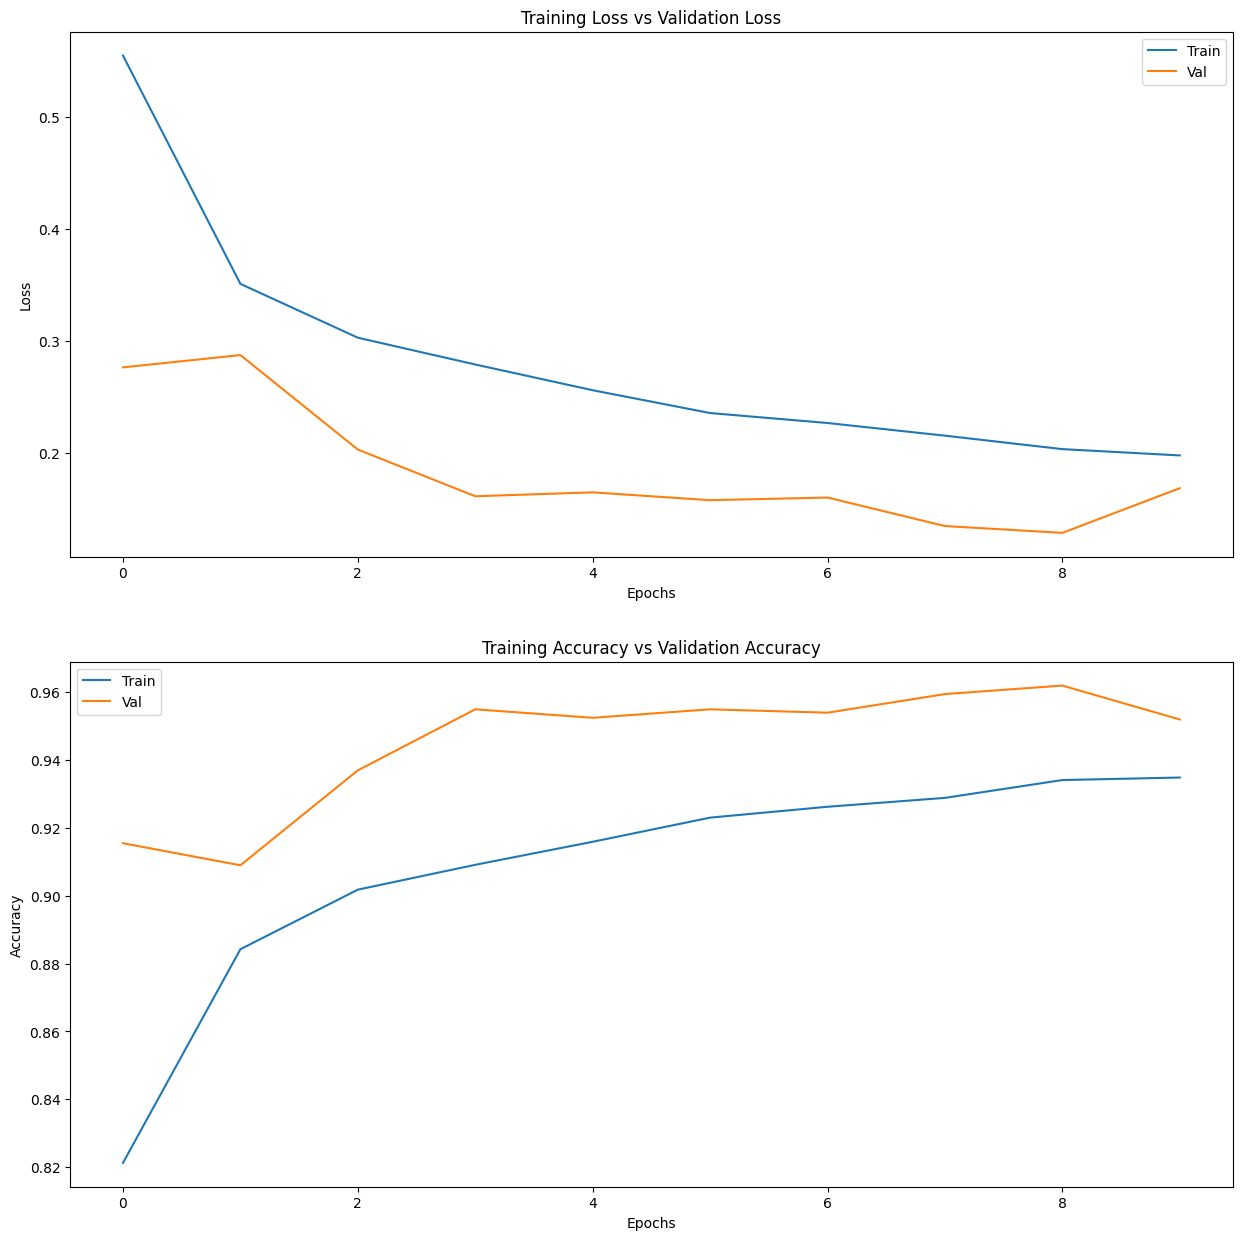

In [20]:
# t.train_model()

class TransferLearning:

    def __init__(self, x_train, x_val, y_train, y_val) -> None:
        self.x_train = x_train
        self.x_val = x_val
        self.y_val = y_val
        self.y_train = y_train
        self.model = None
        self.history = None

    def load_model(self):
        self.model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    
    def mark_layers_non_trainable(self):
        for layer in self.model.layers:
            layer.trainable = False
    
    def add_final_layer(self):
        self.x = layers.Flatten()(self.model.output)
        self.x = layers.Dense(1000, activation='relu')(self.x)
        self.predictions = layers.Dense(10, activation='softmax')(self.x)

    def compile_model(self):
        self.model = Model(inputs=self.model.input, outputs=self.predictions)
        self.model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    
    def train_model(self):
        # Corrected self.x_val and self.y_val
        self.history = self.model.fit(self.x_train, self.y_train, batch_size=32, epochs=10, validation_data=(self.x_val, self.y_val))
    
    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(15, 15))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].title.set_text('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train', 'Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])

# Initialize the transfer learning object with the preprocessed images.
t = TransferLearning(i.x_train, i.x_val, i.y_train, i.y_val)

# Load the pre-trained ResNet50 model.
t.load_model()

# Mark layers as non-trainable.
t.mark_layers_non_trainable()

# Add final layers for classification.
t.add_final_layer()

# Compile the model.
t.compile_model()

# Train the model.
t.train_model()

# Plot the training history.
t.plot_history()


# Plotting the training history

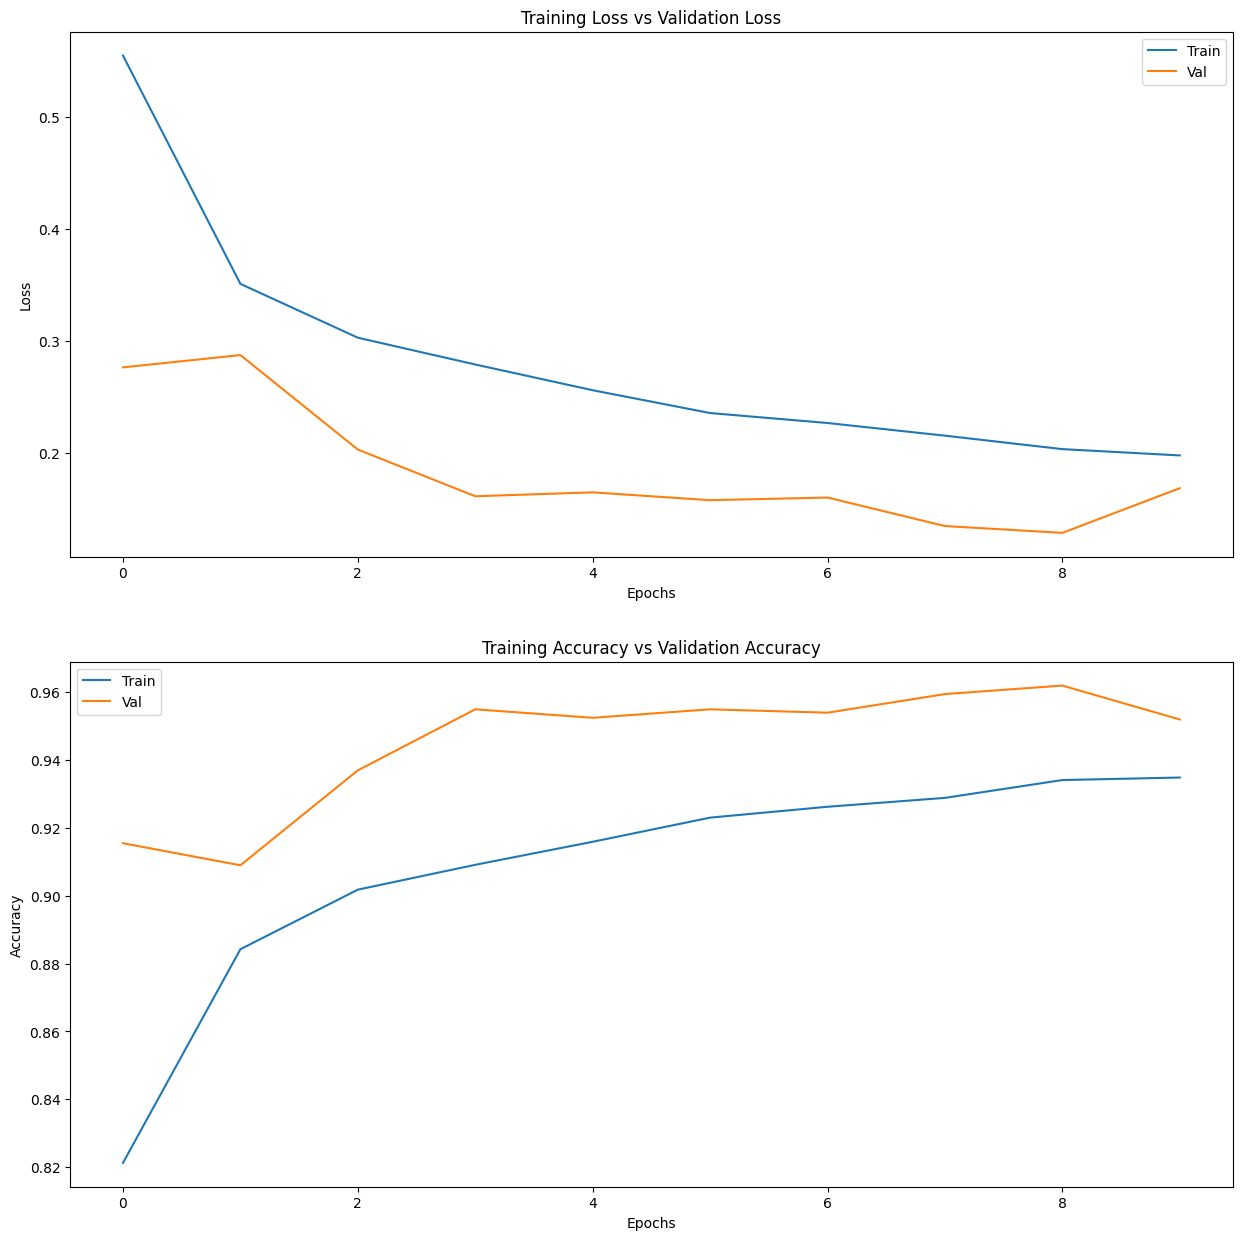

In [21]:
t.plot_history()

# Conclusions

- ResNet50 gives an accuracy of 93.59% and test accuracy of 92.75% on evaluation with the model.

- The model was pretrained on a large variety of images and is being used to classify handwritten digits.

- Hence, transfer learning is demonstrated